In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style("dark")

In [2]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def autolabel(rects):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '{:.2f}'.format(bar_label[idx]),
                ha='center', va='bottom', rotation=0, fontsize=14)

The cell below is only used to read the raw data from the survey and removing the emails provided by people.

In [3]:
#this is to remove the email from the survey
df = pd.read_csv('raw_data.csv')
df = df.drop(
    ['If you want us to be able to send you the results of our study, please give your email address. It will never be shared.',
    'Timestamp'
    ], axis=1)
df.to_csv('data.csv')

Read the data provided by the survey

In [4]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(2)

,What is the highest level of education you have completed so far?,In which of these fields have you previously received qualifications?,"During your previous studies, were you required to develop digital skills? If yes, please specify.",What is your current level of study?,What is your current field of study?,Does your current field of study require digital tools skills/courses?,Have you completed any workshops or had any personal endeavors with digital tools?,Comfort in online learning : [Navigating online course components is easy for me.],Comfort in online learning : [It is easy to get online course components to do what I want them to do.],Comfort in online learning : [It is easy for me to become skillful at using online course components.],...,Stresses related to online work and examinations : [The size of the workload is excessive],Stresses related to online work and examinations : [I am unable to catch up if getting behind my work],Stresses related to online work and examinations : [I have enough time to relax after work],Stresses related to online work and examinations : [The examination questions are usually difficult],Stresses related to online work and examinations : [Examination times are very stressful to me],Stresses related to student’s academic self-perceptions concerning online learning: [I am confident that I will be a successful student],Stresses related to student’s academic self-perceptions concerning online learning: [I am confident that I will be successful in my future career],Stresses related to student’s academic self-perceptions concerning online learning: [I can make academic decisions easily],Stresses related to student’s academic self-perceptions concerning online learning: [I fear failing courses this year],Comparison to classroom learning: [My responses are the same for traditional classroom courses.]
0,Master’s degree or above,"Humanities (history, literature, philosophy, e...",No,Master’s degree or above,"Social sciences (psychology, anthropology, law...",No,Yes,Strongly agree,Strongly agree,Strongly agree,...,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly disagree,Somewhat agree
1,Bachelor’s degree/License,"Social sciences (psychology, anthropology, law...",No,Master’s degree or above,"STEM (science, technology, engineering, math)",Coding (for example: any programming language),Yes,Strongly agree,Somewhat disagree,Somewhat disagree,...,Strongly disagree,Somewhat agree,Strongly agree,Somewhat disagree,Strongly disagree,Somewhat disagree,Strongly agree,Somewhat agree,Somewhat agree,Strongly disagree


In [5]:
print(r"Number of replies :", df.shape[0] , "\nNumber of columns:", df.shape[1])

Number of replies : 32 
Number of columns: 35


This is to map the columns to get shorter names

In [6]:
questions = {}

In [7]:
counter = 1
for i in df.columns.tolist():
    name = '#' + str(counter)
    df[name] = df[i]
    counter += 1
    df = df.drop([i], axis=1)
    questions[name] = i

In [8]:
questions

{'#1': 'What is the highest level of education you have completed so far?',
 '#2': 'In which of these fields have you previously received qualifications?',
 '#3': 'During your previous studies, were you required to develop digital skills? If yes, please specify.',
 '#4': 'What is your current level of study?',
 '#5': 'What is your current field of study?',
 '#6': 'Does your current field of study require digital tools skills/courses?',
 '#7': 'Have you completed any workshops or had any personal endeavors with digital tools?',
 '#8': 'Comfort in online learning :  [Navigating online course components is easy for me.]',
 '#9': 'Comfort in online learning :  [It is easy to get online course components to do what I want them to do.]',
 '#10': 'Comfort in online learning :  [It is  easy for me to become skillful at using online course components.]',
 '#11': 'I can complete required tasks using online learning tools even if: [There is no one around to tell me what to do as I go.]',
 '#12': 

In [9]:
df.head(2)

,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,...,#26,#27,#28,#29,#30,#31,#32,#33,#34,#35
0,Master’s degree or above,"Humanities (history, literature, philosophy, e...",No,Master’s degree or above,"Social sciences (psychology, anthropology, law...",No,Yes,Strongly agree,Strongly agree,Strongly agree,...,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly disagree,Somewhat agree
1,Bachelor’s degree/License,"Social sciences (psychology, anthropology, law...",No,Master’s degree or above,"STEM (science, technology, engineering, math)",Coding (for example: any programming language),Yes,Strongly agree,Somewhat disagree,Somewhat disagree,...,Strongly disagree,Somewhat agree,Strongly agree,Somewhat disagree,Strongly disagree,Somewhat disagree,Strongly agree,Somewhat agree,Somewhat agree,Strongly disagree


We build a dataframe for a heat map

In [10]:
data = df.drop(df.columns[np.arange(0,8)], axis=1)
for i in data.columns.tolist():
    data[i] = data[i].map({'Strongly disagree': 0, 'Somewhat disagree': 1, 'Neither disagree nor agree': 2, 'Somewhat agree': 3, 'Strongly agree': 4})

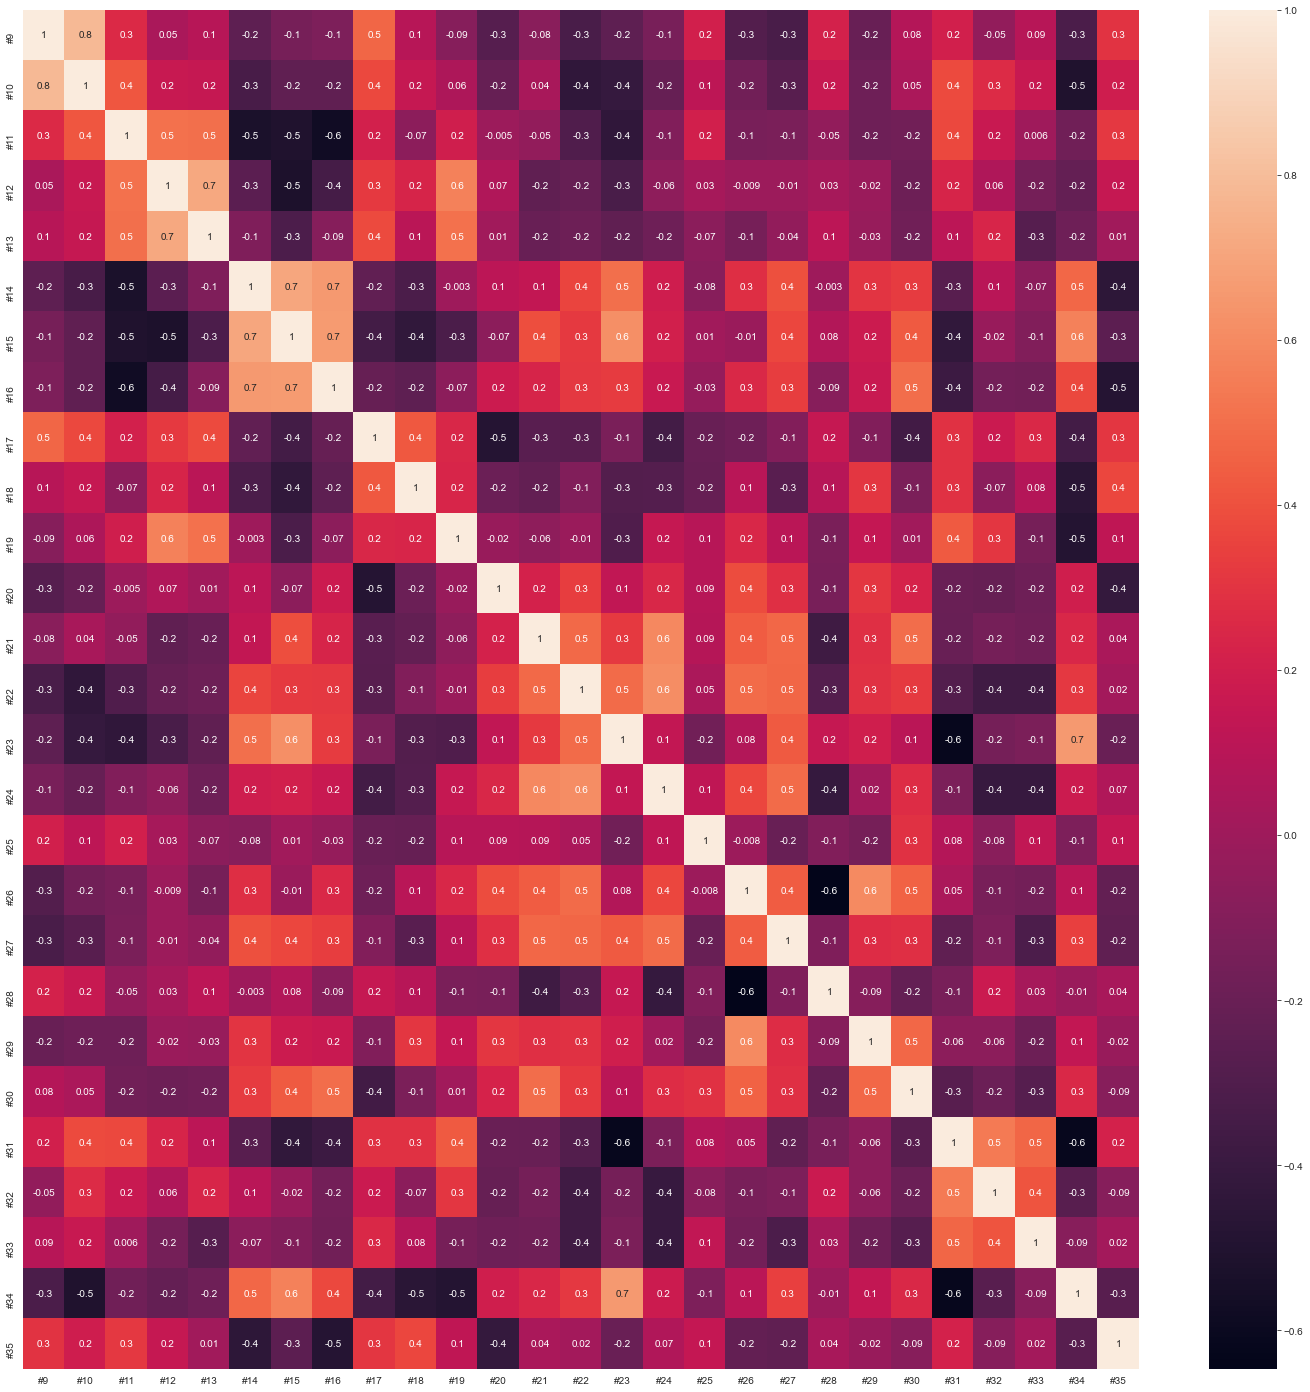

In [11]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(), annot=True, fmt='.1g')

This is to return the best correlation.

In [12]:
print(get_top_abs_correlations(data, 5))

#9   #10    0.787145
#12  #13    0.710980
#14  #15    0.709713
#15  #16    0.663345
#14  #16    0.658449
dtype: float64


***

We need 2 dataframes, one for the demographic data and one for the other.
Doing this, we can plot grouped bar graphs.

In [13]:
non_demographic = df.drop(['#1', '#2', '#3', '#4', '#5', '#6', '#7'], axis=1)
demographic = df[['#1', '#2', '#3', '#4', '#5', '#6', '#7']]

In [14]:
print("Number of non demographic columns :", len(non_demographic.columns.to_list()))

Number of non demographic columns : 28


In [15]:
print("Number of demographic columns :", len(demographic.columns.to_list()))

Number of demographic columns : 7


In [16]:
for i in non_demographic.columns:
    non_demographic[i] = non_demographic[i].astype('category')

In [17]:
cat_values = ['Strongly disagree', 'Somewhat disagree', 'Neither disagree nor agree', 'Somewhat agree', 'Strongly agree']
cat_map = {'Strongly disagree': 0, 'Somewhat disagree': 1, 'Neither disagree nor agree': 2, 'Somewhat agree': 3, 'Strongly agree': 4}

***

In [18]:
non_digital_background = df[(df["#3"] == "No")]
print("Number of persons without digital background :", len(non_digital_background))

Number of persons without digital background : 12


In [19]:
with_digital_background = df[(df["#3"] != "No")]
print("Number of persons with digital background :", len(with_digital_background))


Number of persons with digital background : 20


Text(0, 0.5, 'Count')

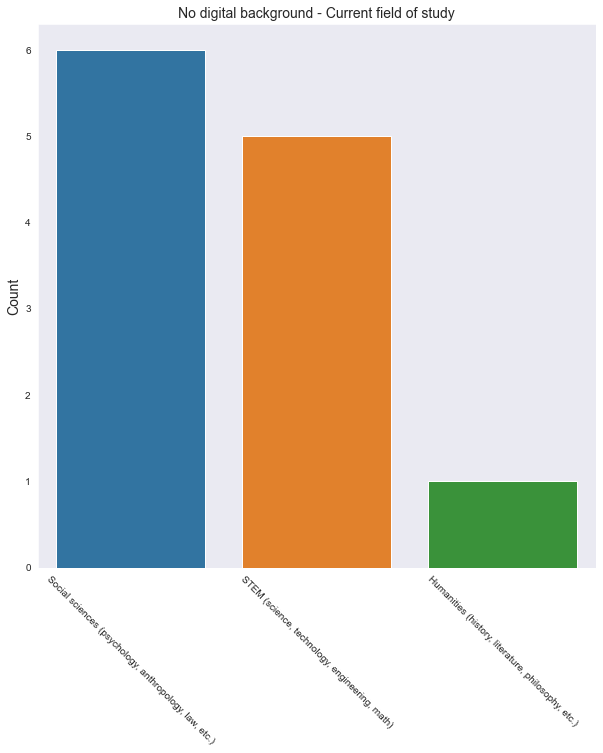

In [20]:
data = df
data['has_digital_background'] = np.where(((data["#3"] == "No")), 0, 1)

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='#5', data=data[data['has_digital_background'] == 0])
plt.xticks(rotation=-45)
plt.xlabel('')
plt.title('No digital background - Current field of study', fontsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=12)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

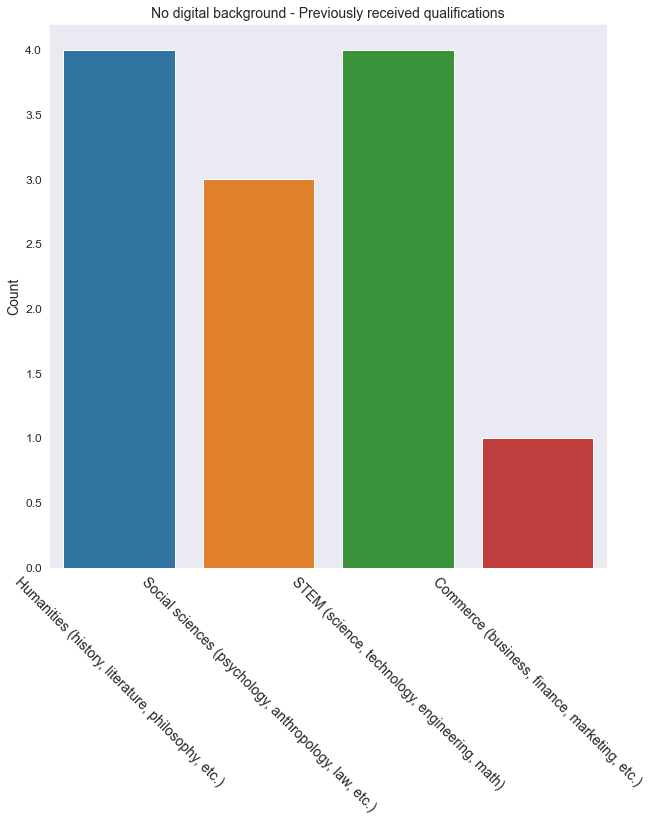

In [21]:
data = df
data['has_digital_background'] = np.where(((data["#3"] == "No")), 0, 1)

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='#2', data=data[data['has_digital_background'] == 0])
plt.xticks(rotation=-45)
plt.xlabel('')
plt.title('No digital background - Previously received qualifications', fontsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=12)
plt.ylabel('Count', fontsize=14)

***

We will separate our result from the survey in 5 families.

### 'Negative' Perceived Ease Of Use and Self-Efficacy Questions
Question 8, 9, 10, 11, 12, 13

In [22]:
data = df[['#3', '#7', '#8', '#9', '#10', '#11', '#12', '#13']]
for col in data[['#8', '#9', '#10', '#11', '#12', '#13']]:
    data[col] = data[col].map(cat_map)

data['has_digital_background'] = np.where(((data["#3"] == "No")), 0, 1)

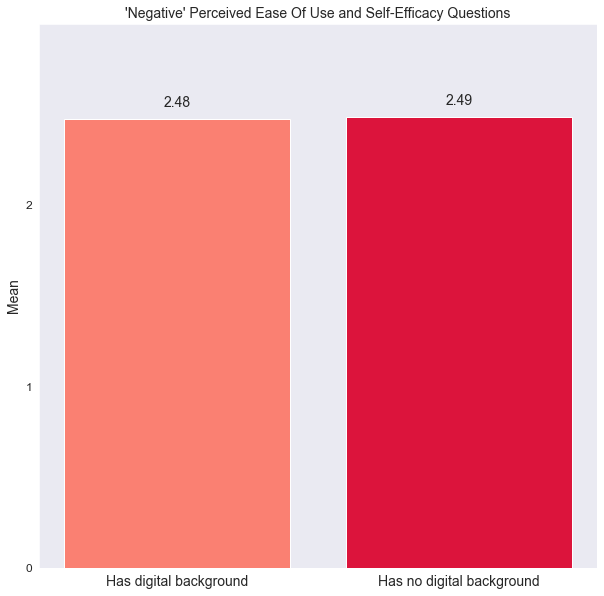

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
title = "'Negative' Perceived Ease Of Use and Self-Efficacy Questions"
bars = ('Has digital background', 'Has no digital background')
bar_x = np.arange(len(bars))
bar_height = [data[data['has_digital_background'] == 1].mean().values.mean(), data[data['has_digital_background'] == 0].mean().values.mean()]
bar_tick_label = ('Has digital background', 'Has no digital background')
bar_label = bar_height

bar_plot = plt.bar(bar_x, bar_height,tick_label=bar_tick_label, color=['salmon', 'crimson'])
autolabel(bar_plot)
plt.ylim(0,3)
plt.xticks(bar_x, bars)

plt.title(title, fontsize=14)
ax.yaxis.set_ticks(np.arange(0, len(data['has_digital_background'].value_counts())+1, 1))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=12)
plt.ylabel('Mean', fontsize=14)
plt.show()

### 'Negative' Stress Related Questions
Question 17, 25, 28, 31, 32, 33

In [24]:
data = df[['#3', '#7', '#17', '#25', '#28', '#31', '#32', '#33']]
for col in data[['#17', '#25', '#28', '#31', '#32', '#33']]:
    data[col] = data[col].map(cat_map)

data['has_digital_background'] = np.where(((data["#3"] == "No")), 0, 1)

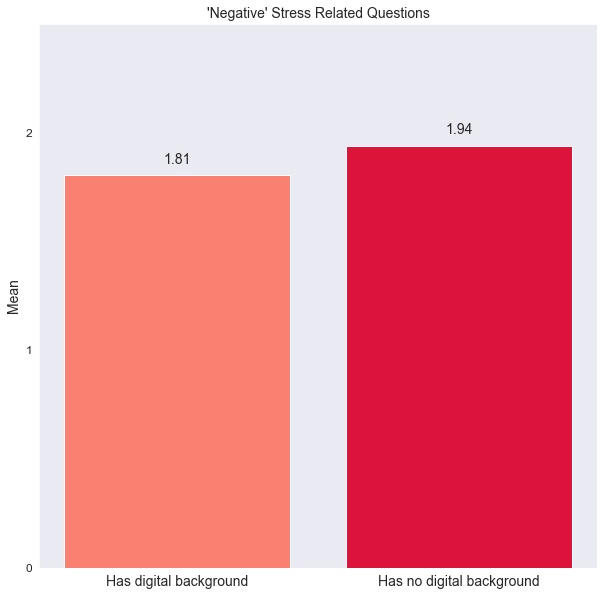

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
title = "'Negative' Stress Related Questions"
bars = ('Has digital background', 'Has no digital background')
bar_x = np.arange(len(bars))
bar_height = [data[data['has_digital_background'] == 1].mean().values.mean(), data[data['has_digital_background'] == 0].mean().values.mean()]
bar_tick_label = ('Has digital background', 'Has no digital background')
bar_label = bar_height

bar_plot = plt.bar(bar_x, bar_height,tick_label=bar_tick_label, color=['salmon', 'crimson'])
autolabel(bar_plot)
plt.ylim(0,2.5)
plt.xticks(bar_x, bars)

plt.title(title, fontsize=14)
ax.yaxis.set_ticks(np.arange(0, len(data['has_digital_background'].value_counts())+1, 1))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=12)
plt.ylabel('Mean', fontsize=14)
plt.show()

### 'Positive' Perceived Ease of Use and Self-Efficacy Questions
Question 14, 15, 16

In [26]:
data = df[['#3', '#7', '#14', '#15', '#16']]
for col in data[['#14', '#15', '#16']]:
    data[col] = data[col].map(cat_map)

data['has_digital_background'] = np.where(((data["#3"] == "No")), 0, 1)

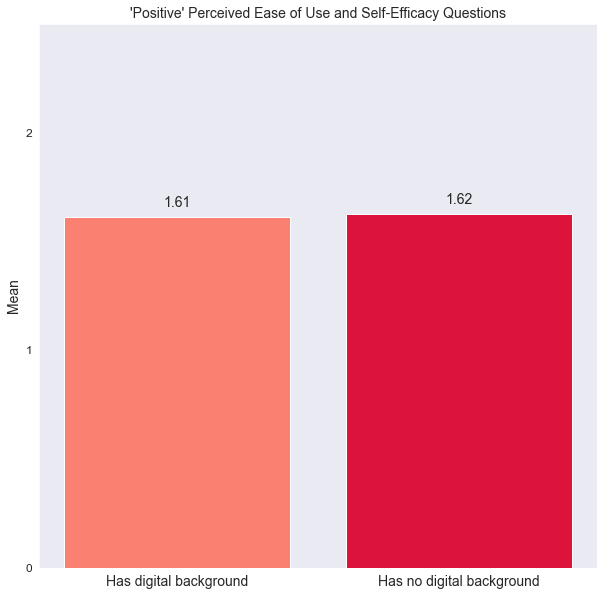

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
title = "'Positive' Perceived Ease of Use and Self-Efficacy Questions"
bars = ('Has digital background', 'Has no digital background')
bar_x = np.arange(len(bars))
bar_height = [data[data['has_digital_background'] == 1].mean().values.mean(), data[data['has_digital_background'] == 0].mean().values.mean()]
bar_tick_label = ('Has digital background', 'Has no digital background')
bar_label = bar_height

bar_plot = plt.bar(bar_x, bar_height,tick_label=bar_tick_label, color=['salmon', 'crimson'])
autolabel(bar_plot)
plt.ylim(0,2.5)
plt.xticks(bar_x, bars)

plt.title(title, fontsize=14)
ax.yaxis.set_ticks(np.arange(0, len(data['has_digital_background'].value_counts())+1, 1))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=12)
plt.ylabel('Mean', fontsize=14)
plt.show()

### 'Positive' Stress related Questions
Question 20, 21, 22, 23, 24, 26, 27, 29, 30, 34

In [28]:
data = df[['#3', '#7', '#20', '#21', '#22', '#23', '#24', '#26', '#27', '#29', '#30', '#34']]
for col in data[['#20', '#21', '#22', '#23', '#24', '#26', '#27', '#29', '#30', '#34']]:
    data[col] = data[col].map(cat_map)

data['has_digital_background'] = np.where(((data["#3"] == "No")), 0, 1)

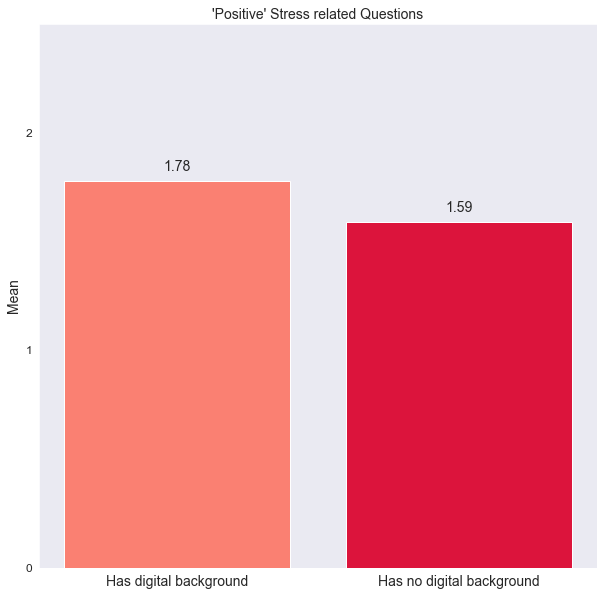

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
title = "'Positive' Stress related Questions"
bars = ('Has digital background', 'Has no digital background')
bar_x = np.arange(len(bars))
bar_height = [data[data['has_digital_background'] == 1].mean().values.mean(), data[data['has_digital_background'] == 0].mean().values.mean()]
bar_tick_label = ('Has digital background', 'Has no digital background')
bar_label = bar_height

bar_plot = plt.bar(bar_x, bar_height,tick_label=bar_tick_label, color=['salmon', 'crimson'])
autolabel(bar_plot)
plt.ylim(0,2.5)
plt.xticks(bar_x, bars)

plt.title(title, fontsize=14)
ax.yaxis.set_ticks(np.arange(0, len(data['has_digital_background'].value_counts())+1, 1))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=12)
plt.ylabel('Mean', fontsize=14)
plt.show()

### 'Neutral' Outside Online Learning Questions
Question 18, 19, 35

In [30]:
data = df[['#3', '#7', '#18', '#19', '#35']]
for col in data[['#18', '#19', '#35']]:
    data[col] = data[col].map(cat_map)

data['has_digital_background'] = np.where(((data["#3"] == "No")), 0, 1)

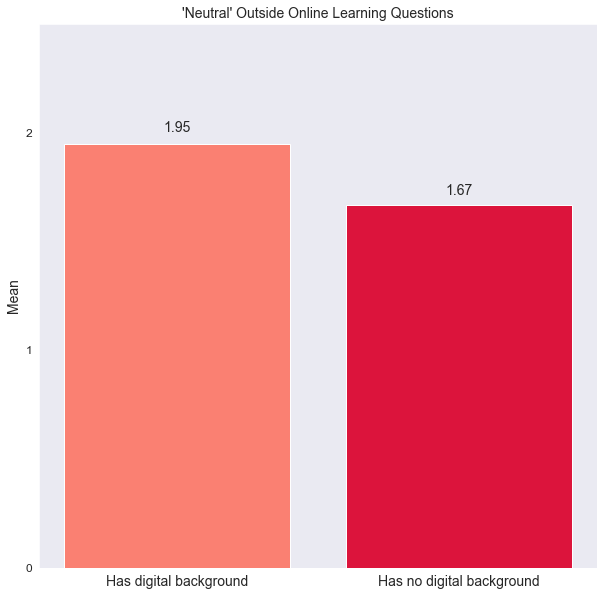

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
title = "'Neutral' Outside Online Learning Questions"
bars = ('Has digital background', 'Has no digital background')
bar_x = np.arange(len(bars))
bar_height = [data[data['has_digital_background'] == 1].mean().values.mean(), data[data['has_digital_background'] == 0].mean().values.mean()]
bar_tick_label = ('Has digital background', 'Has no digital background')
bar_label = bar_height

bar_plot = plt.bar(bar_x, bar_height,tick_label=bar_tick_label, color=['salmon', 'crimson'])
autolabel(bar_plot)
plt.ylim(0,2.5)
plt.xticks(bar_x, bars)

plt.title(title, fontsize=14)
ax.yaxis.set_ticks(np.arange(0, len(data['has_digital_background'].value_counts())+1, 1))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=12)
plt.ylabel('Mean', fontsize=14)
plt.show()

### 'Neutral' Outside Online Learning Questions
Question 18, 19


In [32]:
data = df[['#3', '#7', '#18', '#19']]
for col in data[['#18', '#19']]:
    data[col] = data[col].map(cat_map)

data['has_digital_background'] = np.where(((data["#3"] == "No")), 0, 1)

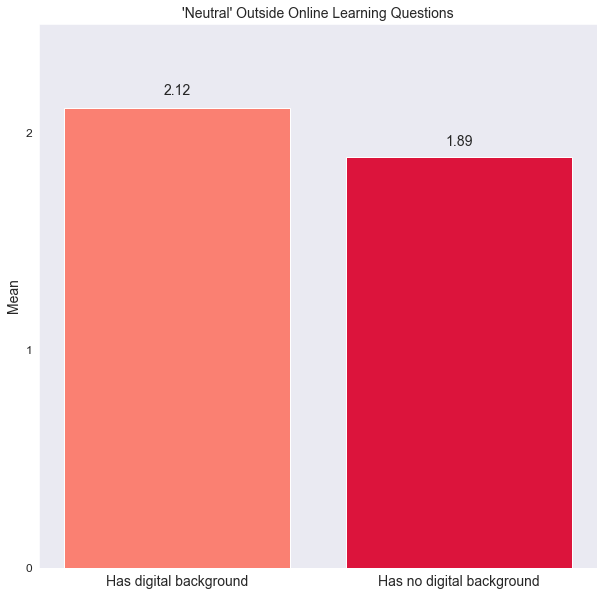

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
title = "'Neutral' Outside Online Learning Questions"
bars = ('Has digital background', 'Has no digital background')
bar_x = np.arange(len(bars))
bar_height = [data[data['has_digital_background'] == 1].mean().values.mean(), data[data['has_digital_background'] == 0].mean().values.mean()]
bar_tick_label = ('Has digital background', 'Has no digital background')
bar_label = bar_height

bar_plot = plt.bar(bar_x, bar_height,tick_label=bar_tick_label, color=['salmon', 'crimson'])
autolabel(bar_plot)
plt.ylim(0,2.5)
plt.xticks(bar_x, bars)

plt.title(title, fontsize=14)
ax.yaxis.set_ticks(np.arange(0, len(data['has_digital_background'].value_counts())+1, 1))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=12)
plt.ylabel('Mean', fontsize=14)
plt.show()

### 'Neutral' Outside Online Learning Questions
Question 35


In [34]:
data = df[['#3', '#7', '#35']]
for col in data[['#35']]:
    data[col] = data[col].map(cat_map)

data['has_digital_background'] = np.where(((data["#3"] == "No")), 0, 1)

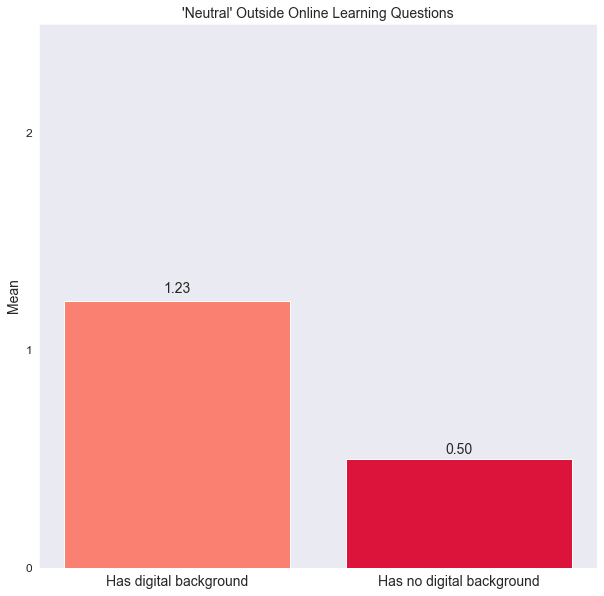

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
title = "'Neutral' Outside Online Learning Questions"
bars = ('Has digital background', 'Has no digital background')
bar_x = np.arange(len(bars))
bar_height = [data[data['has_digital_background'] == 1].mean().values.mean(), data[data['has_digital_background'] == 0].mean().values.mean()]
bar_tick_label = ('Has digital background', 'Has no digital background')
bar_label = bar_height

bar_plot = plt.bar(bar_x, bar_height,tick_label=bar_tick_label, color=['salmon', 'crimson'])
autolabel(bar_plot)
plt.ylim(0,2.5)
plt.xticks(bar_x, bars)

plt.title(title, fontsize=14)
ax.yaxis.set_ticks(np.arange(0, len(data['has_digital_background'].value_counts())+1, 1))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=12)
plt.ylabel('Mean', fontsize=14)
plt.show()